# Data Preprocessing


## Library import


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random

## Data import


In [26]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/04_SGD_BGD_MBGD/homeprices_banglore.csv')

## EDA(exploratory data analysis)


In [27]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


## Feature engineering



In [28]:
sx = MinMaxScaler()
sy = MinMaxScaler()

In [29]:
scaled_x = sx.fit_transform(df.drop('price',axis = 1))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [30]:
df.price.values.reshape(df.shape[0],1)

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [31]:
scaled_y = sy.fit_transform(df.price.values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

## BATCH GRADIENT DESCENT

In [32]:
x = df.drop('price',axis = 1)
print(x.shape,'|',x.shape[1])

(20, 2) | 2


In [33]:
np.ones(x.shape[1])

array([1., 1.])

In [34]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [35]:
scaled_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [36]:
def batch_grad_des(x,y_true,epochs,learning_rate = 0.01):
  number_of_feature = x.shape[1]
  w = np.ones(shape=(number_of_feature))
  b = 0
  total_samples = x.shape[0]
  cost_list = []
  epoch_list = []
  for i in range(epochs):
    y_pred = np.dot(w,x.T) + b
    w_grad = -(2/total_samples)*(x.T.dot(y_true - y_pred))
    b_grad = -(2/total_samples)* np.sum(y_true-y_pred)
    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad
    cost_func = np.mean(np.square(y_true - y_pred))
    if i%10 ==0:
      cost_list.append(cost_func)
      epoch_list.append(i)
  return w,b,cost_func,cost_list,epoch_list

In [37]:
w,b,cost_func,cost_list,epoch_list = batch_grad_des(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)

In [38]:
w,b,cost_func

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

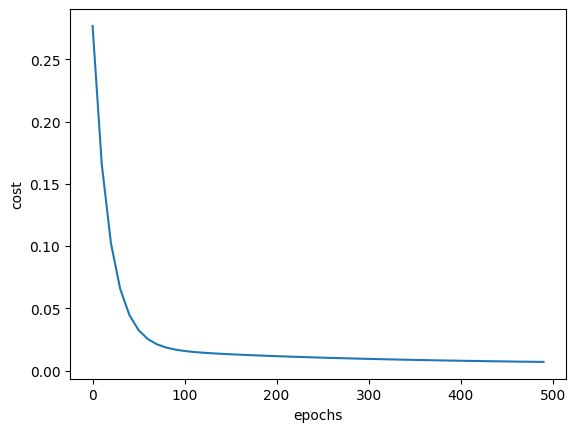

In [39]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [40]:
sx.transform([[2600,4]])
# returns scaled values

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [41]:
def predict_vals(area,bedroom,w,b):
  scaled_x = sx.transform([[area,bedroom]])[0]
  scaled_price = w[0]* scaled_x[0] + w[1]* scaled_x[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]

predict_vals(2600,4,w,b)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.45484403267596)

In [42]:
a = np.array([1,2])
b = np.array([2,3])
np.dot(a,b)

np.int64(8)

## STOCHASTIC GRADIENT DESCENT

In [43]:
def stoch_grad_desc(x,y_true,epochs,learning_rate = 0.01):
  number_of_feature = x.shape[1]
  w = np.ones(shape = (number_of_feature))
  b = 0
  total_sample = x.shape[0]
  cost_list = []
  epoch_list = []
  for i in range(epochs):
    random_ind = random.randint(0,total_sample-1)
    sample_x = x[random_ind]
    sample_y = y_true[random_ind]
    y_pred = np.dot(w,sample_x.T)+ b
    w_grad = -(2/total_sample)*(sample_x.T.dot(sample_y - y_pred))
    b_grad = -(2/total_sample)* (sample_y - y_pred)
    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad
    cost = np.mean(np.square(sample_y-y_pred))
    if i%100 == 0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w,b,cost,cost_list,epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stoch_grad_desc(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)

w_sgd,b_sgd,cost_sgd


(array([0.70911576, 0.67755941]),
 np.float64(-0.23214049967796238),
 np.float64(0.009631095004424519))

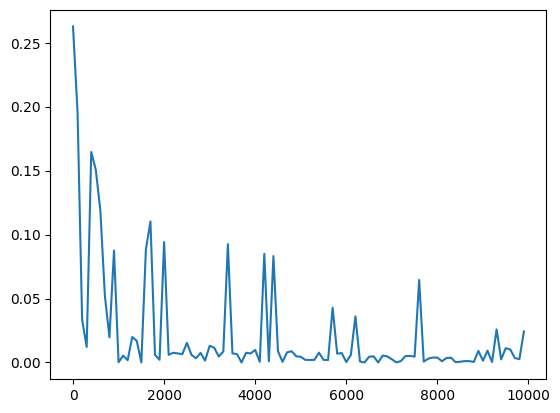

In [44]:
plt.plot(epoch_list_sgd,cost_list_sgd)

In [45]:
predict_vals(2600,4,w_sgd,b_sgd)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.68293247357187)

## MINI BATCH GRADIENT DESCENT

In [47]:
np.random.permutation(20)

array([18, 17, 16, 19, 10,  9,  6, 13,  8, 15,  2,  1, 12,  4, 11,  3, 14,
        5,  0,  7])

In [48]:
def mini_batch_grad_desc(x,y_true,epoch,learning_rate = 0.01,batch_size = 5):
  number_of_features = x.shape[1]
  total_samples = x.shape[0]
  b = 0
  w = np.ones(shape =(number_of_features))
  cost_list = []
  epoch_list = []
  if batch_size > total_samples:
    batch_size = total_samples
  num_of_batches = int(total_samples/batch_size)
  for i in range(epoch):
    random_indices = np.random.permutation(total_samples)
    x_tmp = x[random_indices]
    y_tmp = y_true[random_indices]
    for j in range(0,total_samples,batch_size):
      xj = x_tmp[j:j+batch_size]
      yj = y_tmp[j:j+batch_size]
      y_pred = np.dot(w,xj.T) + b
      w_grad = -(2/total_samples)*(xj.T.dot(yj - y_pred))
      b_grad = -(2/total_samples)*np.sum(yj-y_pred)
      w = w - learning_rate*w_grad
      b = b - learning_rate*b_grad

      cost_func = np.mean(np.square(yj - y_pred))
    if i%10 == 0:
      cost_list.append(cost_func)
      epoch_list.append(i)
  return w,b,cost_func,cost_list,epoch_list

In [51]:
w, b, cost, cost_list, epoch_list = mini_batch_grad_desc(
    scaled_x,scaled_y.reshape(scaled_y.shape[0],),
    epoch = 120,
    batch_size = 5
)

In [52]:
w,b,cost

(array([0.80883411, 0.77679346]),
 np.float64(-0.30508699893288493),
 np.float64(0.02238819613205551))

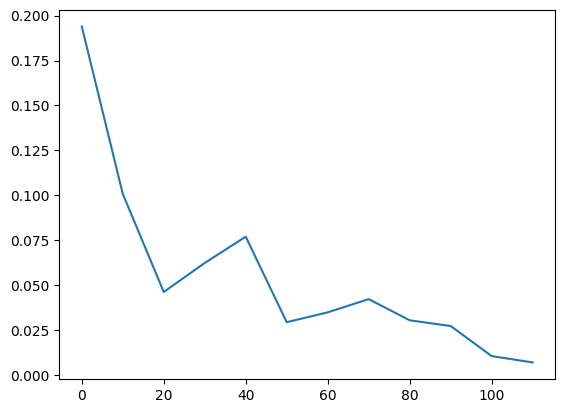

In [53]:
plt.plot(epoch_list,cost_list)